In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [3]:
fruits = pd.read_csv('/Users/DRepani/Documents/Datasets/fruits.csv')
X = fruits[['sphericity', 'weight']]
y = fruits['label']

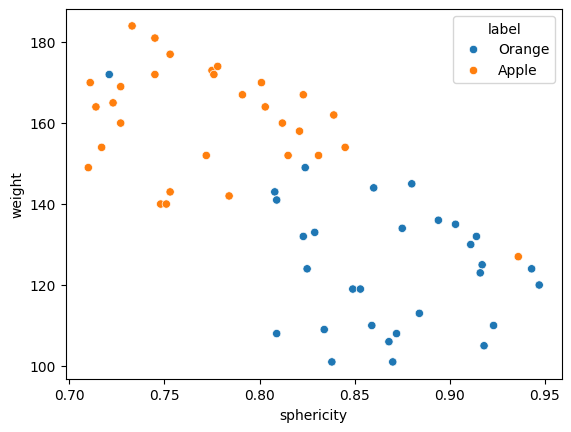

In [4]:
sns.scatterplot(data=fruits, x='sphericity', y='weight', hue='label')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)


In [6]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9333333333333333

In [7]:
model.get_depth(), model.get_n_leaves()

(5, np.int64(9))

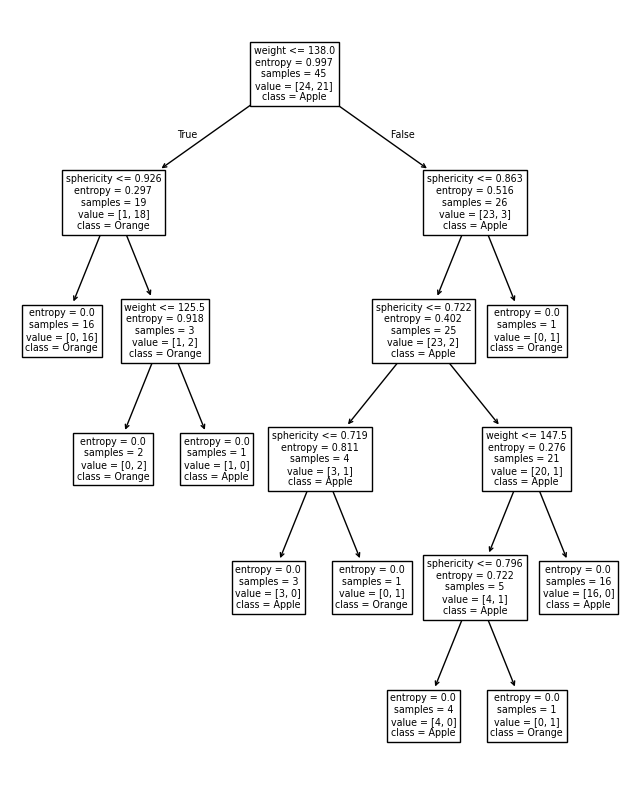

In [8]:
plt.figure(figsize=(8,10))

plot_tree(model, feature_names=X.columns, class_names=model.classes_)
plt.show()

-- If you observe the above plot tree , there are 5 depth of the tree and also 9 leaf nodes ... By default model is trying to split all data to get entropy = 0 and also for close boundary also trying to split the data.




- Instead of the default parameters , we can update the as below:introducing new parameter : `max_depth`

In [9]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8

-- testing accuracy becomes : 80

In [10]:
model.get_depth(), model.get_n_leaves()

(2, np.int64(4))

-- Depth got updated : 2 and leaf nodes : 4

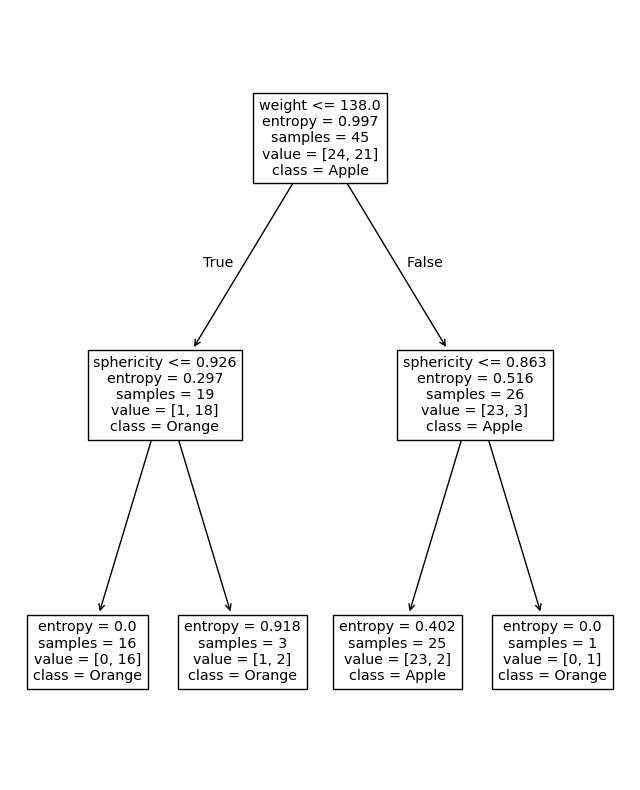

In [11]:
plt.figure(figsize=(8,10))

plot_tree(model, feature_names=X.columns, class_names=model.classes_)
plt.show()

- If you observe the above plot tree , entropy didnt become : 0.

-- Same process , we can process using `min_sample_split`

In [12]:
model = DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8666666666666667

In [13]:
model.get_depth(), model.get_n_leaves()

(5, np.int64(9))

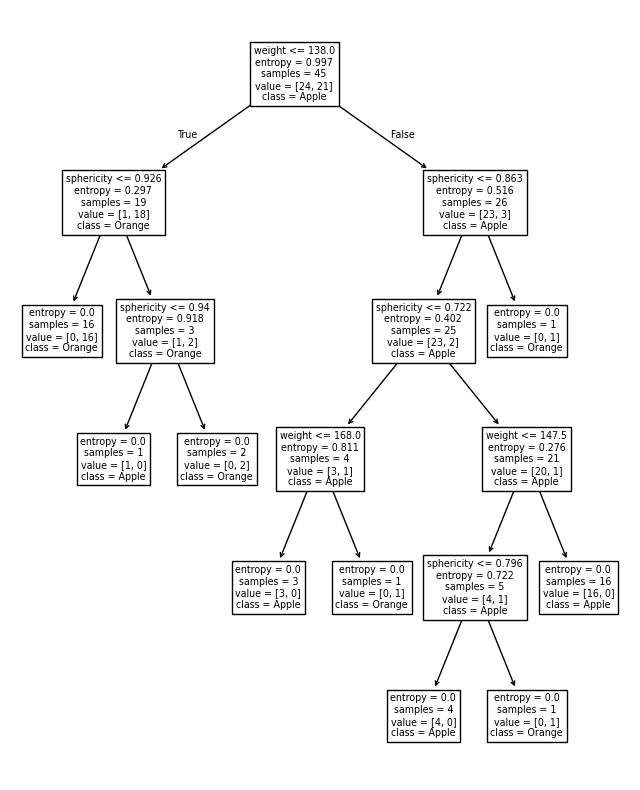

In [14]:
plt.figure(figsize=(8,10))

plot_tree(model, feature_names=X.columns, class_names=model.classes_)
plt.show()

- If you observe the above plot tree, only for splitting 3 samples we are creating boundary ... and also splitting 4 samples also we are creating boundary .

- So better , we can increase the `min_sample_split`: 10

In [15]:
model = DecisionTreeClassifier(criterion='entropy', min_samples_split=10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8

In [16]:
model.get_depth(), model.get_n_leaves()

(4, np.int64(6))

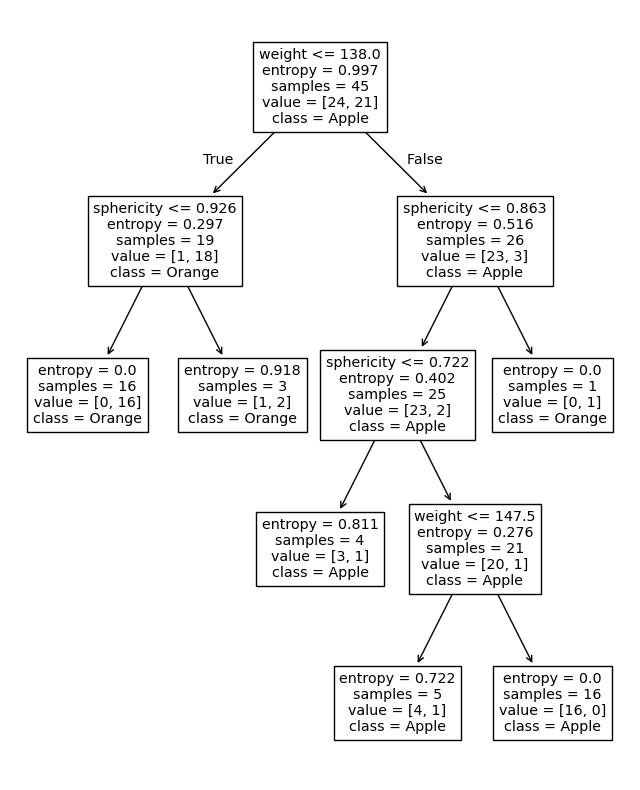

In [17]:
plt.figure(figsize=(8,10))

plot_tree(model, feature_names=X.columns, class_names=model.classes_)
plt.show()

In [18]:
model = DecisionTreeClassifier(criterion='entropy', min_samples_split=25)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8

In [19]:
model.get_depth(), model.get_n_leaves()

(3, np.int64(4))

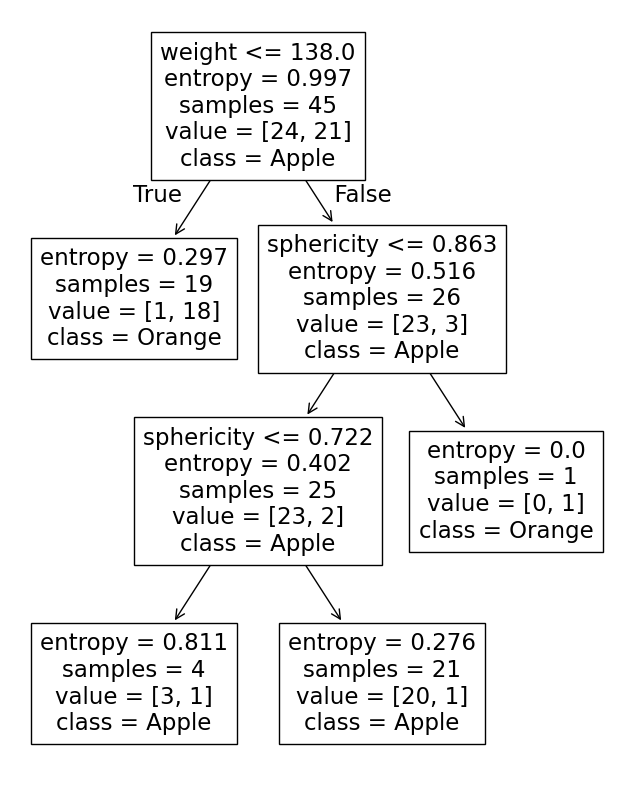

In [20]:
plt.figure(figsize=(8,10))

plot_tree(model, feature_names=X.columns, class_names=model.classes_)
plt.show()

In [21]:
y_predict = model.predict(X_test)
y_predict

array(['Apple', 'Orange', 'Apple', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange', 'Apple', 'Orange', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange'], dtype=object)

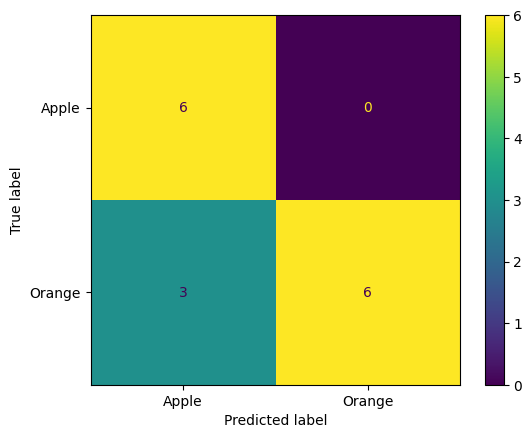

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

`min_sample_leaf`: The leaf should contain minimum of what we have provided value (example leaf should contain minimum : 10)

In [23]:
model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8

In [24]:
model.get_depth(), model.get_n_leaves()

(2, np.int64(3))

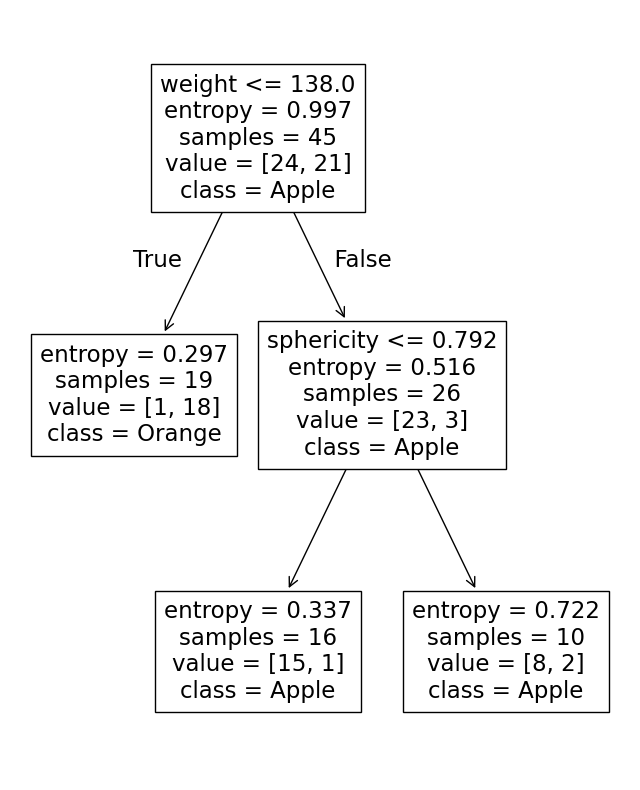

In [25]:
plt.figure(figsize=(8,10))

plot_tree(model, feature_names=X.columns, class_names=model.classes_)
plt.show()

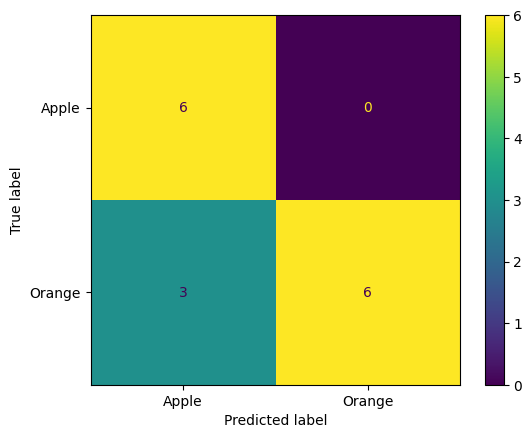

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

- Increasing the `min_sample_leaf`: 20

In [27]:
model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9333333333333333

In [28]:
model.get_depth(), model.get_n_leaves()

(1, np.int64(2))

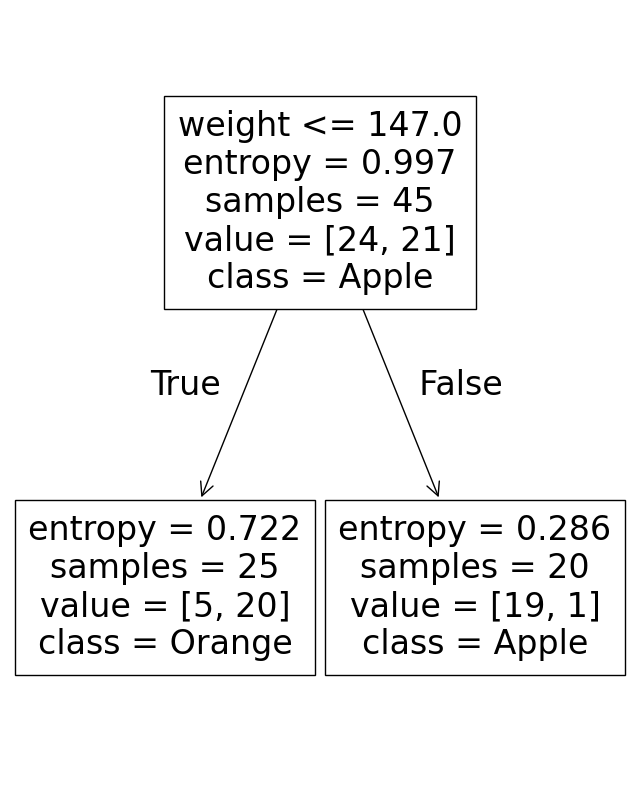

In [29]:
plt.figure(figsize=(8,10))

plot_tree(model, feature_names=X.columns, class_names=model.classes_)
plt.show()

- With this we got testing accuracy as : 93% (thats the important) and its imporving the performance with one depth.
- Earlier , with depth of 3 and depth of 4 we are getting 93 but here with depth of 1: we are getting 93%.
- Thats why its required to control the depth of tree, min,max of leaf and trees.
- Two advantages : Computational better and performance will increase.

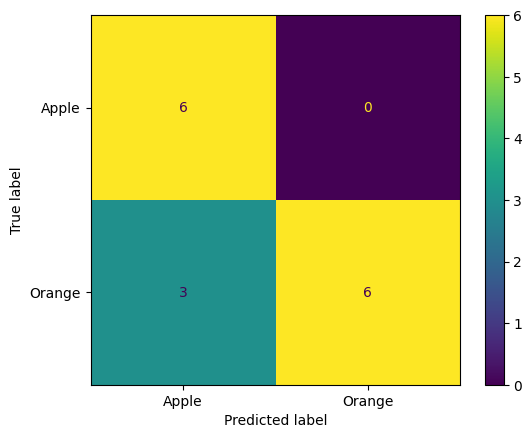

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

`splitter`: There are two values : 'best' and 'random'

Best: Will give the always the same results 
random: will provide each execution will give the different results.